In [13]:
from importlib import reload
import sys

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.ensemble as ens
import sklearn.gaussian_process as gp

colors = sns.color_palette()

sys.path.append('../../../src')
import plots

In [14]:
def normalize_plans(results):
    # Print success
    flag_0 = len(results[results['Flag'] == 0])
    flag_1 = len(results[results['Flag'] == 1])
    flag_2 = len(results[results['Flag'] == 2])
    print(f'Success: {flag_0}, Not Normalized: {flag_1}, Fail: {flag_2}')
    
    # Normalize plans
    if flag_1 > 0:
        for _, row in results.iterrows():
            scale = 4800/row[0]
            for ii in range(7):
                row[ii] *= scale

In [15]:
def plan_score(funcs, pars, goals, results):
    func_vals = 0
    x_grid, _ = plots.format_data(funcs, pars, 'pars')
    x_grid = x_grid[0].values
    ydata, _ = plots.format_data(goals[1:], results, 'goals')
    for ii in range(len(ydata)):
        level = goals.iloc[ii+1]['AcceptanceLevel']
        func_vals += (level - ydata[ii])/level
    return 100*func_vals/(len(goals) - 1)

In [16]:
def plot_dvh(dvh, title):
    plt.figure()
    roi_names = []
    handles = []
    idx = 0
    for roi in dvh.keys():
        if roi != 'Dose':
            handle, = plt.plot(dvh['Dose'], dvh[roi], color=colors[idx])
            plt.plot(dvh_approved['Dose'], dvh_approved[roi], '--', color=colors[idx])
            roi_names.append(roi)
            handles.append(handle)
            idx += 1
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(title)
    plt.legend(handles=handles, labels=roi_names, bbox_to_anchor=(1, 1))

In [17]:
def print_opt(x, fun, method):
    idx = np.argmin(fun)
    print(f'{method} Rib DoseLevel: {x[idx]:.2f}, Penalty Value: {fun[idx]:.2f}')

In [21]:
# Problem
funcs = pd.read_csv('../funcs.csv')
goals = pd.read_csv('../goals.csv')

# Approved plan
#results_approved = pd.read_pickle('approved/results.npy')
#dvh_approved = np.load('approved/dvh.npy', allow_pickle=True).item()

# Default plan
#pars_default = pd.read_pickle('default/pars.npy')
#results_default = pd.read_pickle('default/results.npy')
#fun_default = plan_score(funcs_full, pars_default, goals, results_default)
#dvh_default = np.load('default/dvh.npy', allow_pickle=True).item()

# Random samples
#pars_sample = pd.read_pickle('full/sample/pars.npy')
#results_sample = pd.read_pickle('full/sample/results.npy')
#normalize_plans(results_sample)
#fun_sample = plan_score(funcs_full, pars_sample, goals, results_sample)
            
# # Random search
#results_rand = pd.read_pickle('full/rand/results.npy')
#x_rand = np.load('full/rand/x_iters.npy').squeeze()
#fun_rand = np.load('full/rand/func_vals.npy')
#fun_rand *= -100/(len(goals) - 1)
#dvh_rand = np.load('full/rand/dvh.npy', allow_pickle=True).item()

# Bayesian search
#results_bayes = pd.read_pickle('results.npy')
x_bayes = np.load('x_iters.npy').squeeze()
fun_bayes = np.load('func_vals.npy')
fun_bayes *= -100/(len(goals) - 1)
dvh_bayes = np.load('dvh.npy', allow_pickle=True).item()

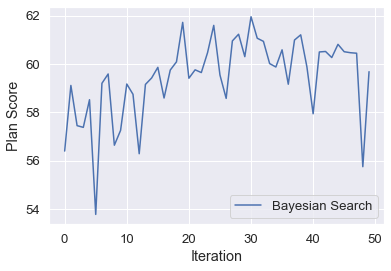

In [24]:
plt.plot(fun_bayes)
plt.xlabel('Iteration')
plt.ylabel('Plan Score')
plt.legend(['Bayesian Search'])

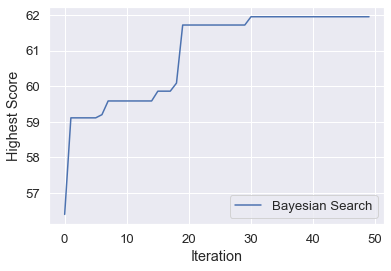

In [28]:
plt.plot(np.maximum.accumulate(fun_bayes))
plt.xlabel('Iteration')
plt.ylabel('Highest Score')
plt.legend(['Bayesian Search'])

In [30]:
labels = []
for ii in range(1, 7):
    roi = goals.iloc[ii]['Roi']
    goal = goals.iloc[ii]['Type']
    labels.append(f'{roi} {goal}')

IndexError: list index out of range

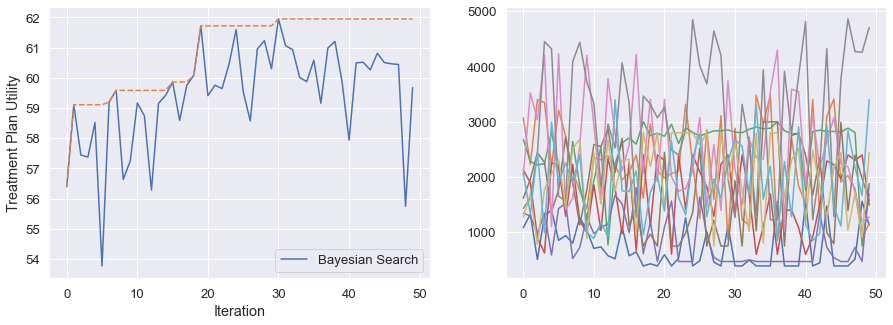

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# function value
#ax[0].plot(fun_rand)
ax[0].plot(fun_bayes)
#ax[0].plot(np.maximum.accumulate(fun_rand), '--', color=colors[0])
ax[0].plot(np.maximum.accumulate(fun_bayes), '--', color=colors[1])
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Treatment Plan Utility')
ax[0].legend(['Bayesian Search'], loc='lower right')


# parameter value
handles = []
for ii in range(x_bayes.shape[1]):
    #ax[1].plot(x_rand[:, ii], '--', color=colors[ii])
    h, = ax[1].plot(x_bayes[:, ii], color=colors[ii])
    handles.append(h)
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('DoseLevel (cGy)')
plt.legend(handles=handles, labels=labels,
           bbox_to_anchor=(1, 1));

In [37]:
ind = 1.5*np.arange(N) 
width = 0.3
#plt.bar(ind - 3/2*width, list(pars_default['DoseLevel'])[1:], width, label='Goal $(\gamma_i)$')
#plt.bar(ind - width/2, list(results_approved.iloc[0])[3:], width, label='Approved Plan')
#plt.bar(ind + width/2, list(results_default.iloc[0])[3:], width, label=r'Default $(\theta_i = \gamma_i)$')
plt.bar(ind + 3/2*width, list(results_bayes.iloc[0])[3:], width, label=r'Bayes $(\theta_i^*)$')

plt.ylabel('Dose Value (cGy)')

plt.xticks(ind, labels, rotation=90)
plt.legend(bbox_to_anchor=(1.475, 1))
plt.show()

NameError: name 'results_bayes' is not defined

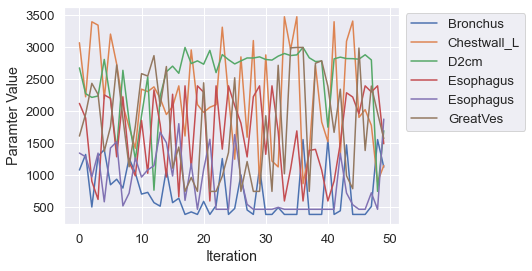

In [39]:
for ii in range(6):
    plt.plot([x_bayes[jj][ii] for jj in range(50)])
plt.xlabel('Iteration')
plt.ylabel('Paramter Value')
plt.legend(goals['Roi'][1:], bbox_to_anchor=(1, 1))

In [40]:
plot_dvh(dvh_bayes, 'Bayesian Search')

KeyError: 'Dose'

<Figure size 432x288 with 0 Axes>

In [42]:
dvh_bayes

{'Doses': array([   0.        ,   70.0539822 ,  140.10796441,  210.16194661,
         280.21592882,  350.26991102,  420.32389323,  490.37787543,
         560.43185764,  630.48583984,  700.53982205,  770.59380425,
         840.64778646,  910.70176866,  980.75575087, 1050.80973307,
        1120.86371528, 1190.91769748, 1260.97167969, 1331.02566189,
        1401.0796441 , 1471.1336263 , 1541.18760851, 1611.24159071,
        1681.29557292, 1751.34955512, 1821.40353733, 1891.45751953,
        1961.51150174, 2031.56548394, 2101.61946615, 2171.67344835,
        2241.72743056, 2311.78141276, 2381.83539497, 2451.88937717,
        2521.94335938, 2591.99734158, 2662.05132378, 2732.10530599,
        2802.15928819, 2872.2132704 , 2942.2672526 , 3012.32123481,
        3082.37521701, 3152.42919922, 3222.48318142, 3292.53716363,
        3362.59114583, 3432.64512804, 3502.69911024, 3572.75309245,
        3642.80707465, 3712.86105686, 3782.91503906, 3852.96902127,
        3923.02300347, 3993.07698568, 4

In [43]:
# Need to revisit all of my code to see what I was using
# Need to clean up plotting routines, etc. data formatting
# what was results.npy? how did I create it?

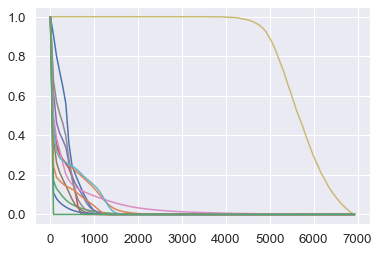

In [49]:
for key in dvh_bayes:
    if key != 'Doses':
        plt.plot(dvh_bayes['Doses'], dvh_bayes[key])